<font size=6><b> lec07_1. 군집분석(Clustering)

* 군집 분석 
    * 데이터를 비슷한 것끼리 그룹을 묶는 것
    * 데이터의 전반적 특징 파악에 유용
    * 답지(target)이 없는 비지도학습(unsupervised learning)


In [1]:
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV


import warnings
warnings.filterwarnings(action='ignore')
sns.set()

# Data Load

In [1]:
dataset =  load_iris()  
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df['target'] = dataset['target']
df.columns = ['sl', 'sw', 'pl','pw', 'target']
df.head()

NameError: name 'pd' is not defined

# KMeans

<pre>
Step-1: Select the value of K, to decide the number of clusters to be formed.

Step-2: Select random K points which will act as centroids.

Step-3: Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid which will form the predefined clusters.

Step-4: place a new centroid of each cluster.

Step-5: Repeat step no.3, which reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to Step 7.

Step-7: FINISH

In [3]:
y = df['target']
X = df.drop(['target'], axis=1)

In [4]:
from sklearn.cluster import KMeans

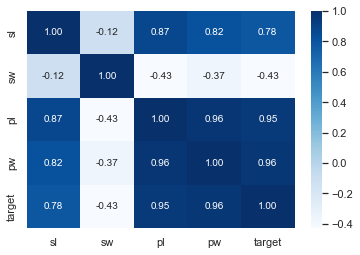

In [5]:
sns.heatmap(df.corr(), fmt=".2f", annot=True, cmap="Blues")
plt.show()

# 1차 : sl, sw 군집화

* class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

In [6]:
kmeans = KMeans(n_clusters=2, random_state=1234)
kmeans.fit(X[["sl", "sw"]])   #---------- y가 없다
pred = kmeans.predict(X[["sl", "sw"]])   #---------- y가 없다
pred, y

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]),
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: target, Length: 150, dtype: int32)

In [7]:
pred_df = pd.DataFrame({"cluser_no":pred,  "target":y})
pred_df["sl"] = df["sl"]
pred_df["sw"] = df["sw"]
pred_df.head()

,cluser_no,target,sl,sw
0,1,0,5.1,3.5
1,1,0,4.9,3.0
2,1,0,4.7,3.2
3,1,0,4.6,3.1
4,1,0,5.0,3.6


## 원본 스캐터

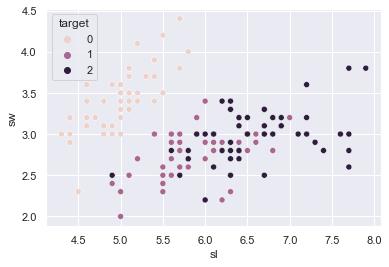

In [8]:
sns.scatterplot(x="sl", y="sw", data=pred_df, hue="target")
plt.show()

## 군집 후 스캐터

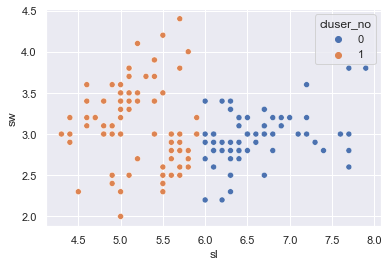

In [9]:
sns.scatterplot(x="sl", y="sw", data=pred_df, hue="cluser_no")
plt.show()

## 실루엣 계수(Silhouette Coefficient) 
* 각 데이터 포인트와 주위 데이터 포인트들과의 거리 계산을 통해 값을 구하며,
* 군집 안에 있는 데이터들은 잘 모여있는지, 군집끼리는 서로 잘 구분되는지 클러스터링을 평가하는 척도로 활용
* <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fmwgtd%2Fbtq7ivAnTTR%2Fk68fwy6QJux825c8wTbeb0%2Fimg.png">
* ref : https://studying-haeung.tistory.com/10

* sklearn.metrics.silhouette_samples(X, labels, *, metric='euclidean', **kwds)

In [10]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score    #--test_size

In [11]:
pred_df.head()

,cluser_no,target,sl,sw
0,1,0,5.1,3.5
1,1,0,4.9,3.0
2,1,0,4.7,3.2
3,1,0,4.6,3.1
4,1,0,5.0,3.6


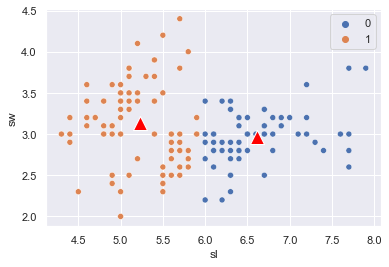

전체 : 0.4630
그룹내(A응집도) : 58.2041
그룹간(A-B거리) : 
 cluser_no
0    0.517842
1    0.418648
Name: sil_coef, dtype: float64 
target      0   1   2
cluser_no            
0           0  24  43
1          50  26   7


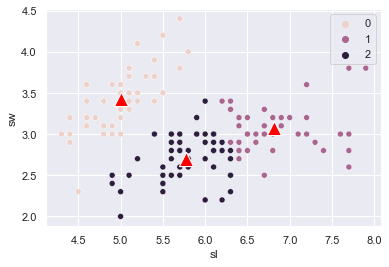

전체 : 0.4451
그룹내(A응집도) : 37.0507
그룹간(A-B거리) : 
 cluser_no
0    0.490080
1    0.442581
2    0.404766
Name: sil_coef, dtype: float64 
target      0   1   2
cluser_no            
0          50   0   0
1           0  12  35
2           0  38  15


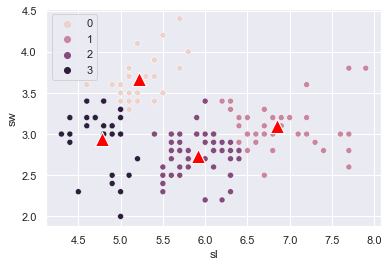

전체 : 0.4207
그룹내(A응집도) : 28.0350
그룹간(A-B거리) : 
 cluser_no
0    0.470462
1    0.397706
2    0.454154
3    0.340450
Name: sil_coef, dtype: float64 
target      0   1   2
cluser_no            
0          29   0   0
1           0  12  31
2           0  33  18
3          21   5   1


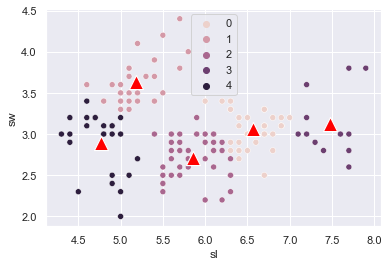

전체 : 0.4159
그룹내(A응집도) : 21.0047
그룹간(A-B거리) : 
 cluser_no
0    0.461955
1    0.460194
2    0.392731
3    0.370605
4    0.352035
Name: sil_coef, dtype: float64 
target      0   1   2
cluser_no            
0           0  13  24
1          32   0   0
2           0  32  13
3           0   0  12
4          18   5   1


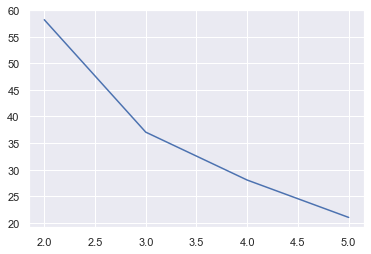

In [12]:
inertia_list = []
for k in [2,3,4,5]:
    
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X[["sl", "sw"]])   #---------- y가 없다
    pred = kmeans.predict(X[["sl", "sw"]])   #---------- y가 없다
    pred, y

    pred_df = pd.DataFrame({"cluser_no":pred,  "target":y})
    pred_df["sl"] = df["sl"]
    pred_df["sw"] = df["sw"]
    pred_df.head()
    
    sns.scatterplot(x="sl", y="sw", data=pred_df, hue="cluser_no")
    sns.scatterplot(x=kmeans.cluster_centers_[:,0]  , y=kmeans.cluster_centers_[:,1],  color="red", s=200, marker="^")
    plt.show()
    plt.close()
    
    # print(kmeans.cluster_centers_)
    
    sil_coef = silhouette_samples(pred_df[['sl','sw']], pred_df["cluser_no"])
    pred_df["sil_coef"] = sil_coef
    
    # inertia_ : Sum of squared distances of ("samples - closest cluster center")
    print(f"전체 : {pred_df['sil_coef'].mean():.4f}") 
    print(f"그룹내(A응집도) : {kmeans.inertia_:.4f}")
    print(f"그룹간(A-B거리) : \n {pred_df.groupby('cluser_no')['sil_coef'].mean()} ")
    
    
    inertia_list.append(kmeans.inertia_)

    ## 평가 & 검증
    cross_df = pd.crosstab(pred_df['cluser_no'], pred_df['target'])
    print(cross_df)
    
## 평가 & 검증
plt.plot([2,3,4,5], inertia_list)    
plt.show()
    

# 2차 : pl, pw 군집화

In [13]:
kmeans = KMeans(n_clusters=2, random_state=1234)
kmeans.fit(X[["pl", "pw"]])   #---------- y가 없다
pred = kmeans.predict(X[["pl", "pw"]])   #---------- y가 없다
# pred, y

pred_df = pd.DataFrame({"cluser_no":pred,  "target":y})
pred_df["pl"] = df["pl"]
pred_df["pw"] = df["pw"]
pred_df.head()


,cluser_no,target,pl,pw
0,0,0,1.4,0.2
1,0,0,1.4,0.2
2,0,0,1.3,0.2
3,0,0,1.5,0.2
4,0,0,1.4,0.2


## 원본 스캐터

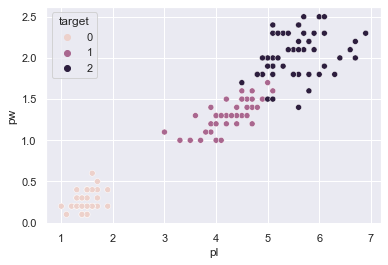

In [14]:
sns.scatterplot(x="pl", y="pw", data=pred_df, hue="target")
plt.show()

## 군집 후 스캐터

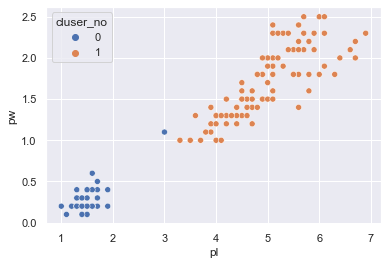

In [15]:
sns.scatterplot(x="pl", y="pw", data=pred_df, hue="cluser_no")
plt.show()

## silhouette 점수보기

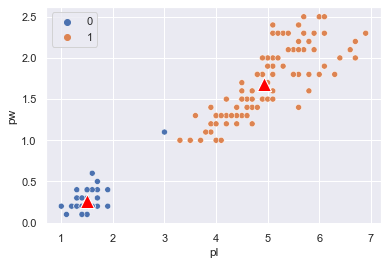

전체 : 0.7654
그룹내(A응집도) : 86.3902
그룹간(A-B거리) : 
 cluser_no
0    0.911260
1    0.690246
Name: sil_coef, dtype: float64 
target      0   1   2
cluser_no            
0          50   1   0
1           0  49  50


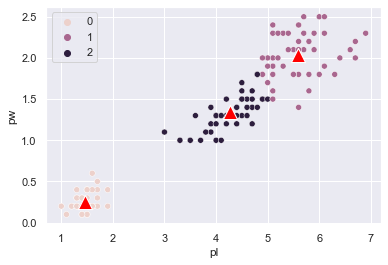

전체 : 0.6605
그룹내(A응집도) : 31.3714
그룹간(A-B거리) : 
 cluser_no
0    0.918772
1    0.485007
2    0.574097
Name: sil_coef, dtype: float64 
target      0   1   2
cluser_no            
0          50   0   0
1           0   2  46
2           0  48   4


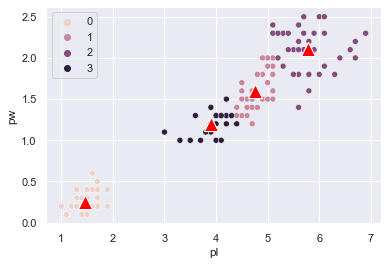

전체 : 0.6128
그룹내(A응집도) : 19.4830
그룹간(A-B거리) : 
 cluser_no
0    0.906331
1    0.496372
2    0.407671
3    0.502265
Name: sil_coef, dtype: float64 
target      0   1   2
cluser_no            
0          50   0   0
1           0  24  14
2           0   0  36
3           0  26   0


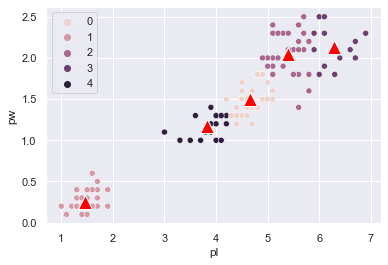

전체 : 0.5884
그룹내(A응집도) : 13.9169
그룹간(A-B거리) : 
 cluser_no
0    0.472682
1    0.903488
2    0.344616
3    0.404379
4    0.497378
Name: sil_coef, dtype: float64 
target      0   1   2
cluser_no            
0           0  28   7
1          50   0   0
2           0   0  30
3           0   0  13
4           0  22   0


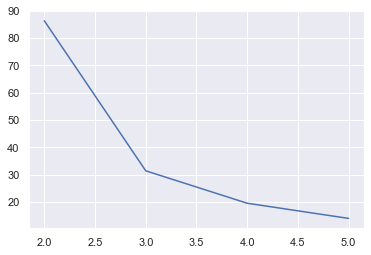

In [16]:
inertia_list = []
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X[["pl", "pw"]])   #---------- y가 없다
    pred = kmeans.predict(X[["pl", "pw"]])   #---------- y가 없다
    pred, y

    pred_df = pd.DataFrame({"cluser_no":pred,  "target":y})
    pred_df["pl"] = df["pl"]
    pred_df["pw"] = df["pw"]
    pred_df.head()
    
    sns.scatterplot(x="pl", y="pw", data=pred_df, hue="cluser_no")
    sns.scatterplot(x=kmeans.cluster_centers_[:,0]  , y=kmeans.cluster_centers_[:,1],  color="red", s=200, marker="^")
    plt.show()
    plt.close()
    
    # print(kmeans.cluster_centers_)
    
    sil_coef = silhouette_samples(pred_df[['pl','pw']], pred_df["cluser_no"])
    pred_df["sil_coef"] = sil_coef
    
    print(f"전체 : {pred_df['sil_coef'].mean():.4f}") 
    print(f"그룹내(A응집도) : {kmeans.inertia_:.4f}")
    print(f"그룹간(A-B거리) : \n {pred_df.groupby('cluser_no')['sil_coef'].mean()} ")
    # inertia_ : Sum of squared distances of ("samples - closest cluster center")
   

    
    inertia_list.append(kmeans.inertia_)

    ## 평가 & 검증
    cross_df = pd.crosstab(pred_df['cluser_no'], pred_df['target'])
    print(cross_df)
    
## 평가 & 검증
plt.plot([2,3,4,5], inertia_list)    
plt.show()
    

# 3차 : PCA 후 군집화

          pc1       pc2
0   -1.309711  0.650541
1   -1.324357 -0.360512
2   -1.409674 -0.295230
3   -1.339582 -0.648304
4   -1.331469  0.665527
..        ...       ...
145  0.948622  0.381962
146  0.745176 -0.764438
147  0.860907  0.160618
148  0.927559  0.237545
149  0.678338 -0.575718

[150 rows x 2 columns]


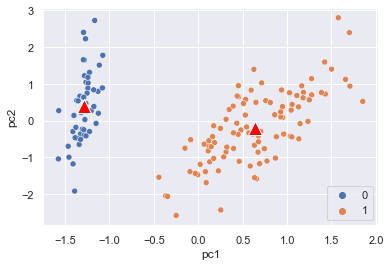

전체 : 0.4913
그룹내(A응집도) : 163.9797
그룹간(A-B거리) : 
 cluser_no
0    0.553699
1    0.460062
Name: sil_coef, dtype: float64 
target      0   1   2
cluser_no            
0          50   0   0
1           0  50  50


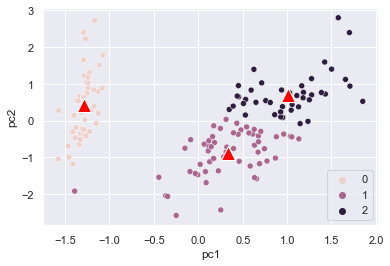

전체 : 0.5042
그룹내(A응집도) : 90.8958
그룹간(A-B거리) : 
 cluser_no
0    0.520627
1    0.464967
2    0.538235
Name: sil_coef, dtype: float64 
target      0   1   2
cluser_no            
0          49   0   0
1           1  37  20
2           0  13  30


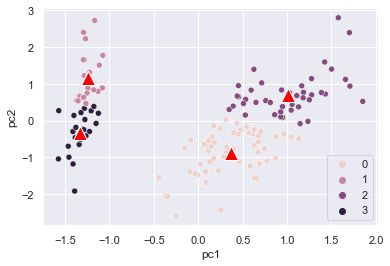

전체 : 0.4944
그룹내(A응집도) : 64.1220
그룹간(A-B거리) : 
 cluser_no
0    0.449626
1    0.502937
2    0.524306
3    0.535268
Name: sil_coef, dtype: float64 
target      0   1   2
cluser_no            
0           0  37  20
1          24   0   0
2           0  13  30
3          26   0   0


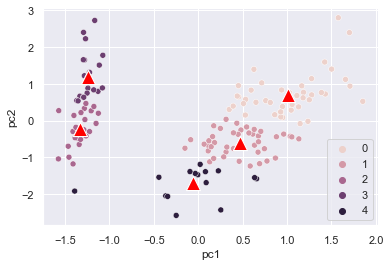

전체 : 0.4628
그룹내(A응집도) : 48.9251
그룹간(A-B거리) : 
 cluser_no
0    0.426974
1    0.464741
2    0.556855
3    0.480388
4    0.369585
Name: sil_coef, dtype: float64 
target      0   1   2
cluser_no            
0           0  13  30
1           0  26  17
2          26   0   0
3          23   0   0
4           1  11   3


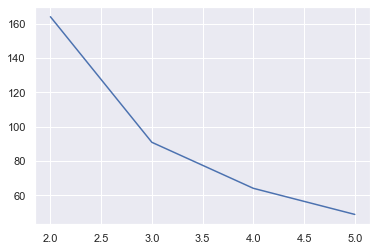

2차 PCA 후 모델 설명력 : 0.977685206318795  [0.92461872 0.05306648]


In [17]:
y = df['target']
X = df.drop(['target'], axis=1)

ncomp_list = [2]
for ncomp in ncomp_list:
    pca = PCA(n_components=ncomp, random_state=1234)
    X_pca = pca.fit_transform(X)

    scaler = StandardScaler()
    X_pca_scaler = scaler.fit_transform(X_pca)
    pca_df = pd.DataFrame(X_pca_scaler, columns=["pc1","pc2"])
    
    
    print(pca_df)
    
    
    inertia_list = []
    for k in [2,3,4,5]:
        kmeans = KMeans(n_clusters=k, random_state=1234)
        kmeans.fit(pca_df[["pc1", "pc2"]])   #---------- y가 없다
        pred = kmeans.predict(pca_df[["pc1", "pc2"]])   #---------- y가 없다
        pred, y

        pred_df = pd.DataFrame({"cluser_no":pred,  "target":y})
        pred_df["pc1"] = pca_df["pc1"]
        pred_df["pc2"] = pca_df["pc2"]
        pred_df.head()

        sns.scatterplot(x="pc1", y="pc2", data=pred_df, hue="cluser_no")
        sns.scatterplot(x=kmeans.cluster_centers_[:,0]  , y=kmeans.cluster_centers_[:,1],  color="red", s=200, marker="^")
        plt.show()
        plt.close()

        # print(kmeans.cluster_centers_)

        sil_coef = silhouette_samples(pred_df[['pc1','pc2']], pred_df["cluser_no"])
        pred_df["sil_coef"] = sil_coef

        print(f"전체 : {pred_df['sil_coef'].mean():.4f}") 
        print(f"그룹내(A응집도) : {kmeans.inertia_:.4f}")
        print(f"그룹간(A-B거리) : \n {pred_df.groupby('cluser_no')['sil_coef'].mean()} ")
        # inertia_ : Sum of squared distances of ("samples - closest cluster center")
        
        inertia_list.append(kmeans.inertia_)

        ## 평가 & 검증
        cross_df = pd.crosstab(pred_df['cluser_no'], pred_df['target'])
        print(cross_df)

    ## 평가 & 검증
    plt.plot([2,3,4,5], inertia_list)    
    plt.show()

    print(f"2차 PCA 후 모델 설명력 : {np.sum(pca.explained_variance_ratio_)}  {pca.explained_variance_ratio_}")
    
    # rf = RandomForestClassifier(random_state=1234)
    # rf.fit(X_train_scaler, y_train)
    # pred = rf.predict(X_test_scaler)
    # print(   f1_score(y_test, pred,  average='macro') )
    # print( classification_report(y_test, pred) )
